# Largest falls in real GDP in (currently) advanced economies since 1870

This is a replication exercise using the `data.table` package in R and the Maddison Database. The graph to replicate is:

![title](cost.jpg)

In [1]:
library(data.table)

In [2]:
df <- read.csv("Maddision-project.csv", stringsAsFactors = FALSE)
head(df, 10)

countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
AFG,Afghanistan,1820,NA,NA,3280,,
AFG,Afghanistan,1870,NA,NA,4207,,
AFG,Afghanistan,1913,NA,NA,5730,,
AFG,Afghanistan,1950,2392,2392,8150,Extrapolated,
AFG,Afghanistan,1951,2422,2422,8284,Extrapolated,
AFG,Afghanistan,1952,2462,2462,8425,Extrapolated,
AFG,Afghanistan,1953,2568,2568,8573,Extrapolated,
AFG,Afghanistan,1954,2576,2576,8728,Extrapolated,
AFG,Afghanistan,1955,2579,2579,8891,Extrapolated,
AFG,Afghanistan,1956,2644,2644,9062,Extrapolated,


Note: The Maddison Project has two time series, `rgdpnapc` and `cgdppc`. The first one is purely within-country data, with the international price comparison done once (in 2011). The second series coerces the GDP data to fit every international price comparison the Maddison Project has on record. For this purpose we will use `rgdpnapc`.

## Post 1870

In [11]:
dt <- data.table(df[df$countrycode != "" & df$year >= 1870,c("countrycode", "country", "year", "rgdpnapc")])

Create a gdp growth variable from 1 to 10 years

In [12]:
for (i in 1:10) {
    dt[, paste0("diff_",i) := (rgdpnapc - shift(rgdpnapc, i))/shift(rgdpnapc,i), by = countrycode]
}

Explore

In [13]:
head(dt, 10)

countrycode,country,year,rgdpnapc,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
AFG,Afghanistan,1870,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AFG,Afghanistan,1913,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AFG,Afghanistan,1950,2392,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AFG,Afghanistan,1951,2422,0.012541806,NA,NA,NA,NA,NA,NA,NA,NA,NA
AFG,Afghanistan,1952,2462,0.016515277,0.029264214,NA,NA,NA,NA,NA,NA,NA,NA
AFG,Afghanistan,1953,2568,0.043054427,0.060280760,0.073578595,NA,NA,NA,NA,NA,NA,NA
AFG,Afghanistan,1954,2576,0.003115265,0.046303818,0.063583815,0.076923077,NA,NA,NA,NA,NA,NA
AFG,Afghanistan,1955,2579,0.001164596,0.004283489,0.047522340,0.064822461,0.07817726,NA,NA,NA,NA,NA
AFG,Afghanistan,1956,2644,0.025203567,0.026397516,0.029595016,0.073923639,0.09165979,0.10535117,NA,NA,NA,NA
AFG,Afghanistan,1957,2593,-0.019288956,0.005428461,0.006599379,0.009735202,0.05320877,0.07060281,0.0840301,NA,NA,NA


Create sub-table with only country and differences

In [14]:
sub_dt <- dt[, .(country, diff_1, diff_2, diff_3, diff_4, diff_5,
              diff_6, diff_7, diff_8, diff_9, diff_10)]

In [15]:
head(sub_dt)

country,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,0.01254181,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,0.01651528,0.02926421,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,0.04305443,0.06028076,0.0735786,NA,NA,NA,NA,NA,NA,NA


Get the largest fall per country

In [16]:
sub_dt <- sub_dt[, lapply(.SD, min, na.rm = TRUE), by = country]

In [17]:
head(sub_dt)

country,diff_1,diff_2,diff_3,diff_4,diff_5,diff_6,diff_7,diff_8,diff_9,diff_10
Afghanistan,-0.3370166,-0.5260896,-0.5616127,-0.6124498,-0.6265119,-0.6614035,-0.6920622,-0.7222022,-0.7140741,-0.7208966
Angola,-0.2629687,-0.3251822,-0.3371738,-0.3482081,-0.3370179,-0.3365498,-0.2756598,-0.2771739,-0.2738279,-0.2871336
Albania,-0.2656040,-0.2943422,-0.2879474,-0.2825839,-0.2779692,-0.2734628,-0.2688997,-0.2651391,-0.2608184,-0.2566225
United Arab Emirates,-0.1514626,-0.2373265,-0.3228744,-0.3633580,-0.4004127,-0.4362605,-0.4367274,-0.4366152,-0.4428697,-0.4621449
Argentina,-0.2128909,-0.1706620,-0.1997317,-0.2652174,-0.2852559,-0.2551672,-0.2699240,-0.2456518,-0.2370797,-0.2160400
Armenia,-0.4046754,-0.4831527,-0.5316256,-0.5696959,-0.5280594,-0.5373686,-0.5643328,-0.5681323,-0.5551188,-0.5409424


In [18]:
largest_fall <- cbind(sub_dt[,c("country")], apply(sub_dt[,-1], 1, min))

In [19]:
names(largest_fall) <- c("country", "gdp_fall")
head(largest_fall)

country,gdp_fall
Afghanistan,-0.7222022
Angola,-0.3482081
Albania,-0.2943422
United Arab Emirates,-0.4621449
Argentina,-0.2852559
Armenia,-0.5696959


In [20]:
largest_fall[,c("year", "number_years")] <- numeric()

In [21]:
head(largest_fall)

country,gdp_fall,year,number_years
Afghanistan,-0.7222022,NA,NA
Angola,-0.3482081,NA,NA
Albania,-0.2943422,NA,NA
United Arab Emirates,-0.4621449,NA,NA
Argentina,-0.2852559,NA,NA
Armenia,-0.5696959,NA,NA


In [22]:
largest_fall[country == "Afghanistan", 3] <- 1

In [23]:
for (eachcountry in largest_fall$country) {
    tmp <- dt[country == eachcountry]
    loc <- which(tmp == largest_fall[country == eachcountry, gdp_fall], arr.ind = TRUE)
    tmp <- cbind(tmp[loc[1], c(2,3)],loc[2] - 4)
    names(tmp) <- c("country", "year", "number_years")
    largest_fall[country == eachcountry, 3] <- tmp$year
    largest_fall[country == eachcountry, 4] <- tmp$number_years
}

In [24]:
head(largest_fall)

country,gdp_fall,year,number_years
Afghanistan,-0.7222022,1994,8
Angola,-0.3482081,1994,4
Albania,-0.2943422,1992,2
United Arab Emirates,-0.4621449,2010,10
Argentina,-0.2852559,1917,5
Armenia,-0.5696959,1993,4


List of currently advanced economies by the IMF:

In [25]:
advanced_economies = c("Australia",
"Austria",
"Belgium",
"Canada",
"Cyprus",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"China, Hong Kong SAR",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Japan",
"Republic of Korea",
"Latvia",
"Lithuania",
"Luxembourg",
"Macao SAR",
"Malta",
"Netherlands",
"New Zealand",
"Norway",
"Portugal",
"Puerto Rico",
"San Marino",
"Singapore",
"Slovakia",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Taiwan, Province of China",
"United Kingdom",
"United States")

In [26]:
largest_fall$advanced <- ifelse(largest_fall$country %in% advanced_economies, TRUE, FALSE)

In [27]:
head(largest_fall)

country,gdp_fall,year,number_years,advanced
Afghanistan,-0.7222022,1994,8,FALSE
Angola,-0.3482081,1994,4,FALSE
Albania,-0.2943422,1992,2,FALSE
United Arab Emirates,-0.4621449,2010,10,FALSE
Argentina,-0.2852559,1917,5,FALSE
Armenia,-0.5696959,1993,4,FALSE


In [28]:
largest_fall$period <- paste0(largest_fall$year - largest_fall$number_years, " - ", largest_fall$year)

In [29]:
final <- largest_fall[order(rank(gdp_fall))][advanced == TRUE, .(country, period, gdp_fall)]

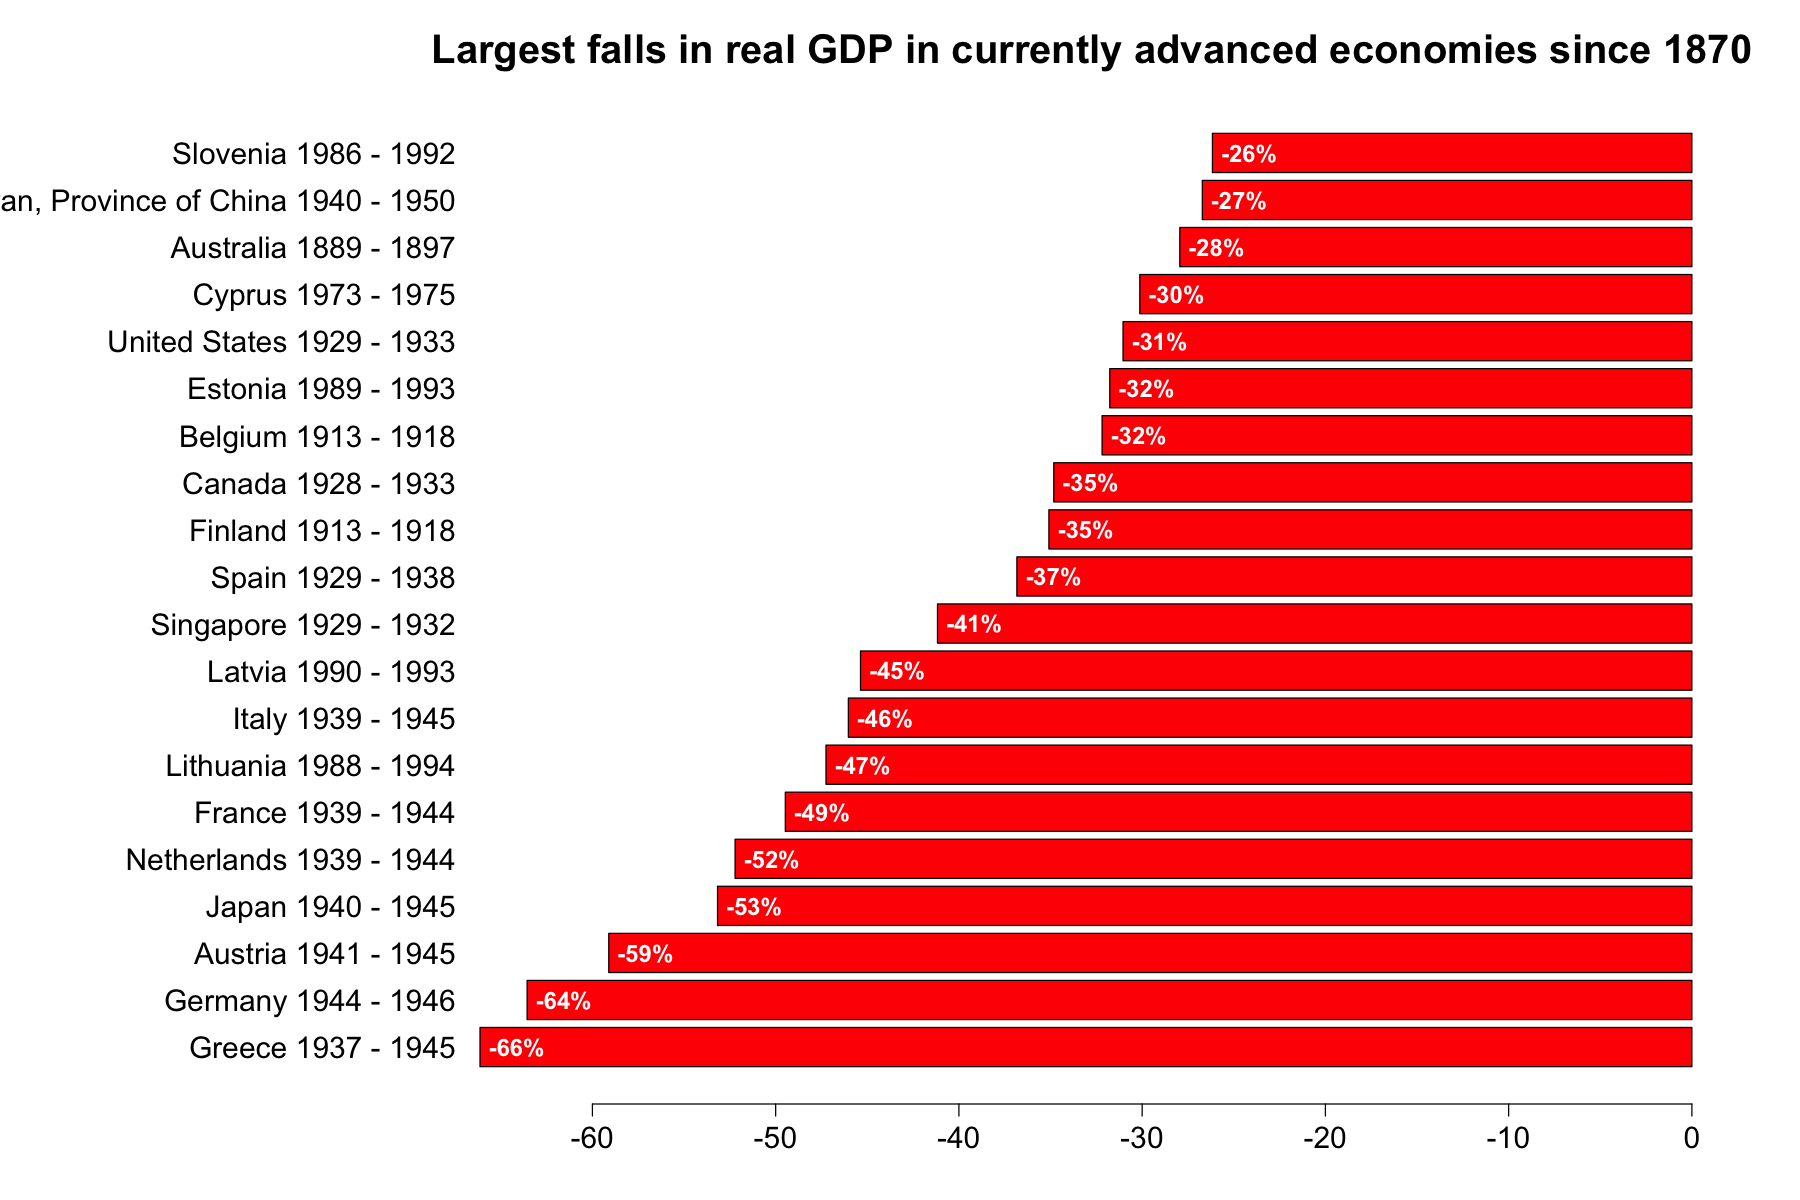

In [30]:
par(mar=c(4,20,4,4))
options(repr.plot.width=15, repr.plot.height=10)
bp <- barplot(head(final$gdp_fall * 100,20), horiz = TRUE, col = 'red', 
        main = "Largest falls in real GDP in currently advanced economies since 1870",
       names.arg = paste(head(final$country,20),head(final$period,20)), las=1, cex.axis = 1.5, cex.main = 2,
       cex.names = 1.5)
text(head(final$gdp_fall * 100,20) + 2, bp, 
     paste0(signif(head(final$gdp_fall * 100,20),2),"%"), col = "white", cex = 1.2, font = 2)

## Post 2000

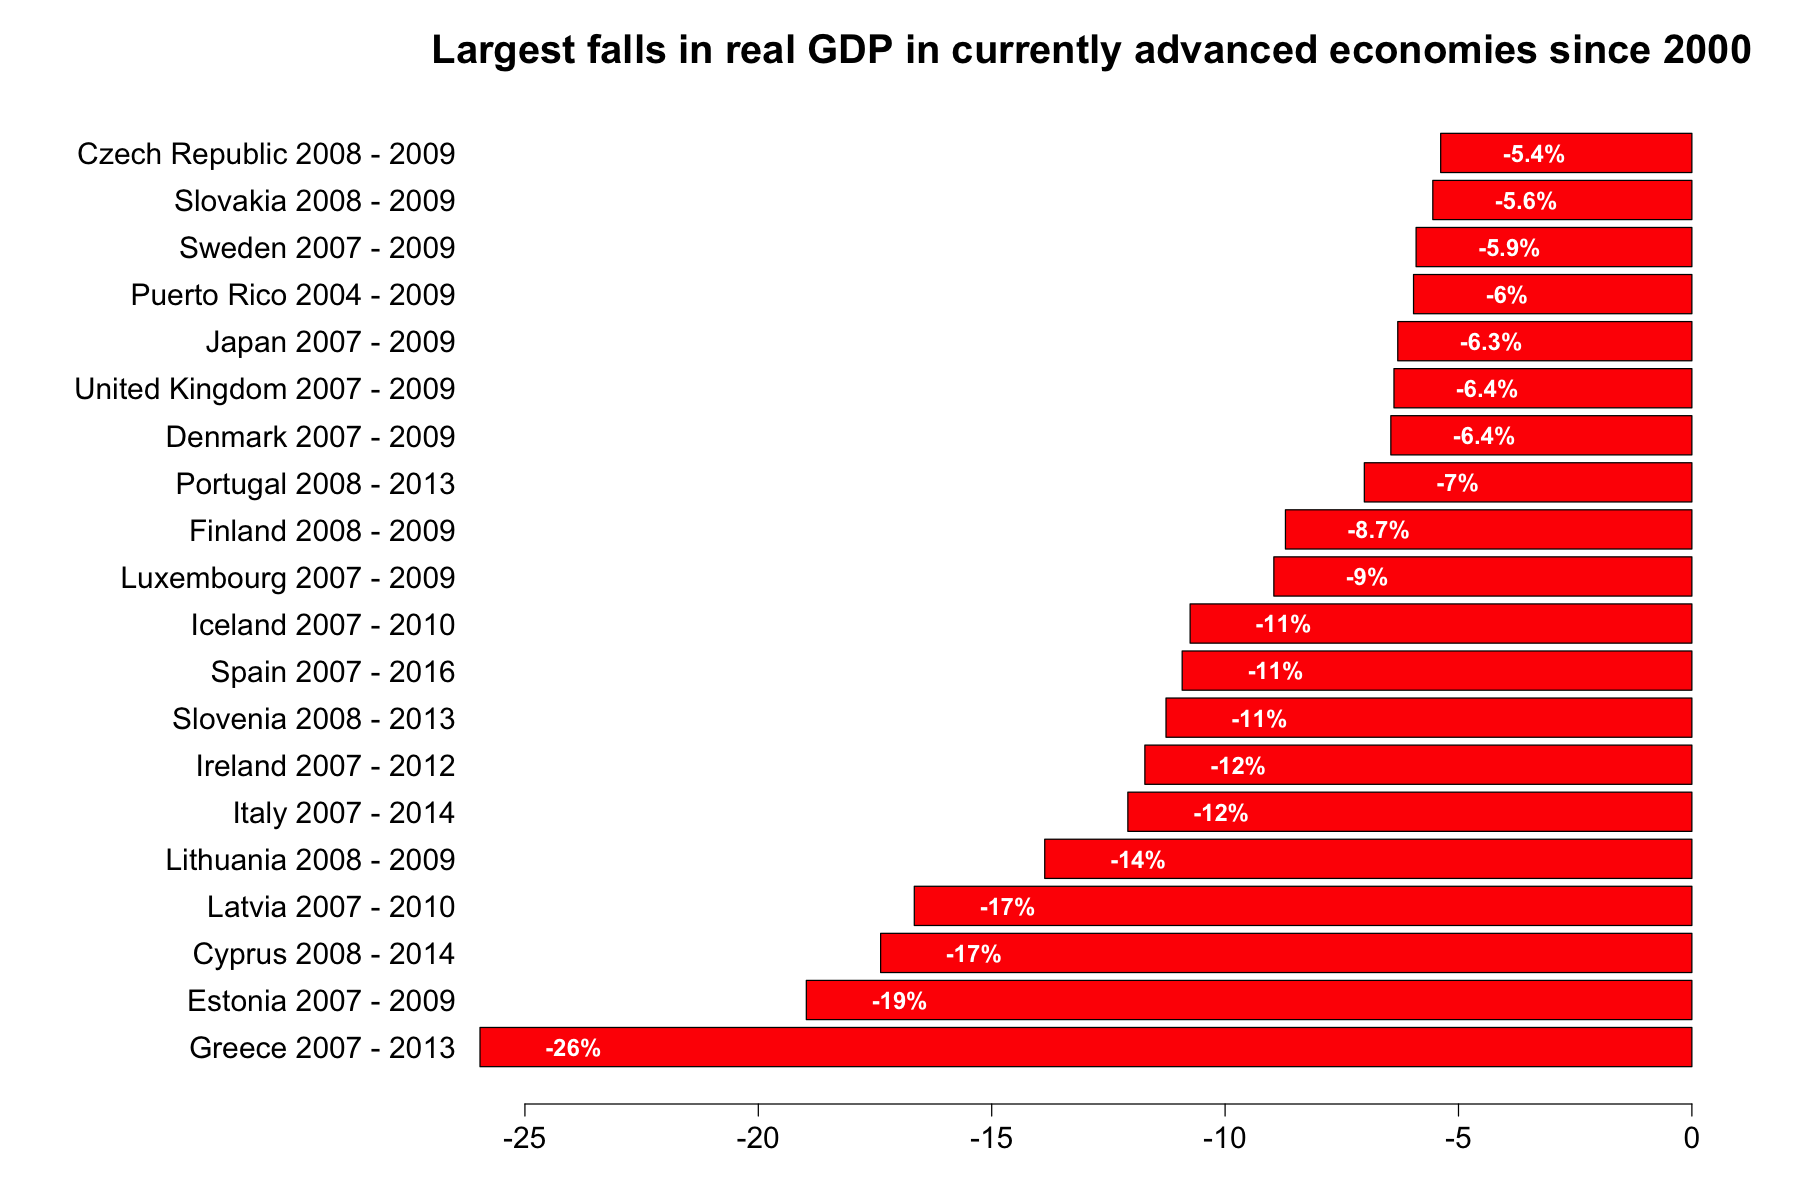

In [33]:
dt <- data.table(df[df$countrycode != "" & df$year >= 2000 ,c("countrycode", "country", "year", "rgdpnapc")])

for (i in 1:10) {
    dt[, paste0("diff_",i) := (rgdpnapc - shift(rgdpnapc, i))/shift(rgdpnapc,i), by = countrycode]
}

sub_dt <- dt[, .(country, diff_1, diff_2, diff_3, diff_4, diff_5,
              diff_6, diff_7, diff_8, diff_9, diff_10)]

sub_dt <- sub_dt[, lapply(.SD, min, na.rm = TRUE), by = country]

largest_fall <- cbind(sub_dt[,c("country")], apply(sub_dt[,-1], 1, min))

names(largest_fall) <- c("country", "gdp_fall")

largest_fall[,c("year", "number_years")] <- numeric()

for (eachcountry in largest_fall$country) {
    tmp <- dt[country == eachcountry]
    loc <- which(tmp == largest_fall[country == eachcountry, gdp_fall], arr.ind = TRUE)
    tmp <- cbind(tmp[loc[1], c(2,3)],loc[2] - 4)
    names(tmp) <- c("country", "year", "number_years")
    largest_fall[country == eachcountry, 3] <- tmp$year
    largest_fall[country == eachcountry, 4] <- tmp$number_years
}

largest_fall$advanced <- ifelse(largest_fall$country %in% advanced_economies, TRUE, FALSE)

largest_fall$period <- paste0(largest_fall$year - largest_fall$number_years, " - ", largest_fall$year)

final <- largest_fall[order(rank(gdp_fall))][advanced == TRUE, .(country, period, gdp_fall)]

par(mar=c(4,20,4,4))
options(repr.plot.width=15, repr.plot.height=10)
bp <- barplot(head(final$gdp_fall * 100,20), horiz = TRUE, col = 'red', 
        main = "Largest falls in real GDP in currently advanced economies since 2000",
       names.arg = paste(head(final$country,20),head(final$period,20)), las=1, cex.axis = 1.5, cex.main = 2,
       cex.names = 1.5)
text(head(final$gdp_fall * 100,20) + 2, bp, 
     paste0(signif(head(final$gdp_fall * 100,20),2),"%"), col = "white", cex = 1.2, font = 2)